In [ ]:
import pandas as pd
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = 'https://drive.google.com/uc?id=1DExflyRCumRCftp9roxxcHOcwRyuWrw-'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)

print(data.head())

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Training Set Shape:", train_data.shape)
print("Test Set Shape:", test_data.shape)

Downloading...
From: https://drive.google.com/uc?id=1DExflyRCumRCftp9roxxcHOcwRyuWrw-
To: /content/dataset.csv
100%|██████████| 3.88M/3.88M [00:00<00:00, 194MB/s]

   age           worktype   fnlwt   education  education_number  \
0   39          State-gov   77516   Bachelors                13   
1   50   Self-emp-not-inc   83311   Bachelors                13   
2   38            Private  215646     HS-grad                 9   
3   53            Private  234721        11th                 7   
4   28            Private  338409   Bachelors                13   

        marital_status          occupation relatioship_status    race  \
0        Never-married        Adm-clerical      Not-in-family   White   
1   Married-civ-spouse     Exec-managerial            Husband   White   
2             Divorced   Handlers-cleaners      Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners            Husband   Black   
4   Married-civ-spouse      Prof-specialty               Wife   Black   

       sex  capital_gain  capital_loss  hours_per_week  native_country  \
0     Male          2174             0              40   United-States   
1     Male

In [ ]:
target_column = 'income'
X_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column]
X_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column]

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100)
lr_model = LogisticRegression()

svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

svm_predictions = svm_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
lr_predictions = lr_model.predict(X_test_scaled)

print("\nSVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ["', '', '', '', 'hours_per_week', '', ''"]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ["', '', '', '', 'hours_per_week', '', ''"]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



SVM Accuracy: 0.8565945033010901
Random Forest Accuracy: 0.8598188238906802
Logistic Regression Accuracy: 0.8572086596038692

SVM Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.76      0.59      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Random Forest Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.75      0.63      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4942


In [ ]:
svm_predictions = svm_model.predict(X_test_scaled)
print("\nSVM Model Performance on Test Data")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

rf_predictions = rf_model.predict(X_test_scaled)
print("\nRandom Forest Model Performance on Test Data")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

lr_predictions = lr_model.predict(X_test_scaled)
print("\nLogistic Regression Model Performance on Test Data")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))



SVM Model Performance on Test Data
Accuracy: 0.8565945033010901
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.76      0.59      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix:
 [[4646  296]
 [ 638  933]]

Random Forest Model Performance on Test Data
Accuracy: 0.8598188238906802
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.75      0.63      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513

Confusion Matrix:
 [[4604  338]
 [ 575  996]]

Logistic Regression Model Performance on Test Data
Accuracy: 0.85

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_predictions = svm_model.predict(X_test_scaled)
print("\n--- SVM Model ---")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

rf_predictions = rf_model.predict(X_test_scaled)
print("\n--- Random Forest Model ---")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

lr_predictions = lr_model.predict(X_test_scaled)
print("\n--- Logistic Regression Model ---")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))



--- SVM Model ---
Accuracy: 0.8565945033010901
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.76      0.59      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix:
 [[4646  296]
 [ 638  933]]

--- Random Forest Model ---
Accuracy: 0.8598188238906802
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.75      0.63      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513

Confusion Matrix:
 [[4604  338]
 [ 575  996]]

--- Logistic Regression Model ---
Accuracy: 0.8572086596038692
Classification Report:
             

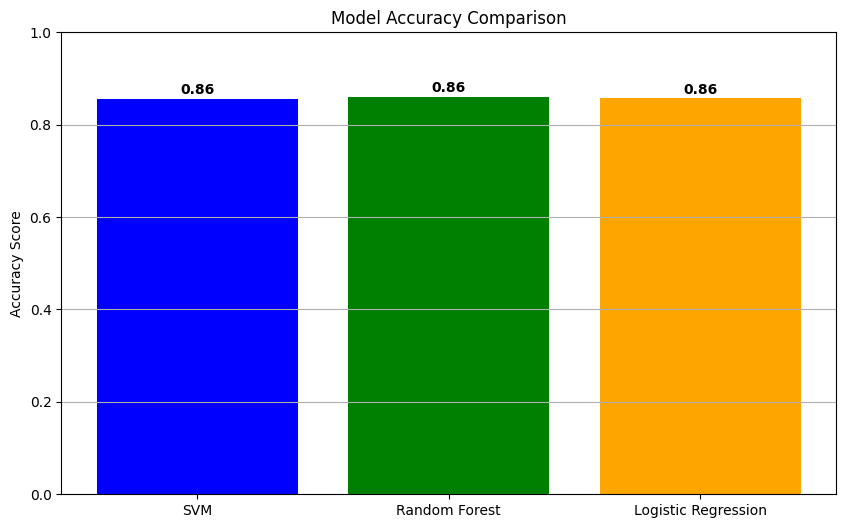

In [ ]:
import matplotlib.pyplot as plt

svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

model_names = ['SVM', 'Random Forest', 'Logistic Regression']
accuracies = [svm_accuracy, rf_accuracy, lr_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


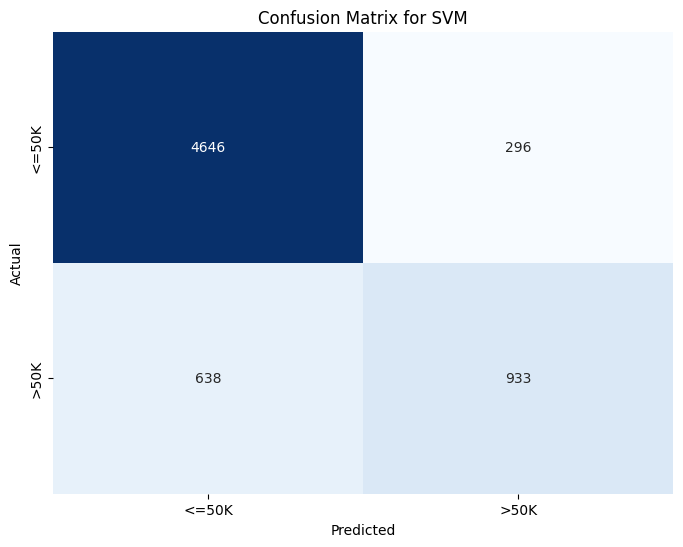

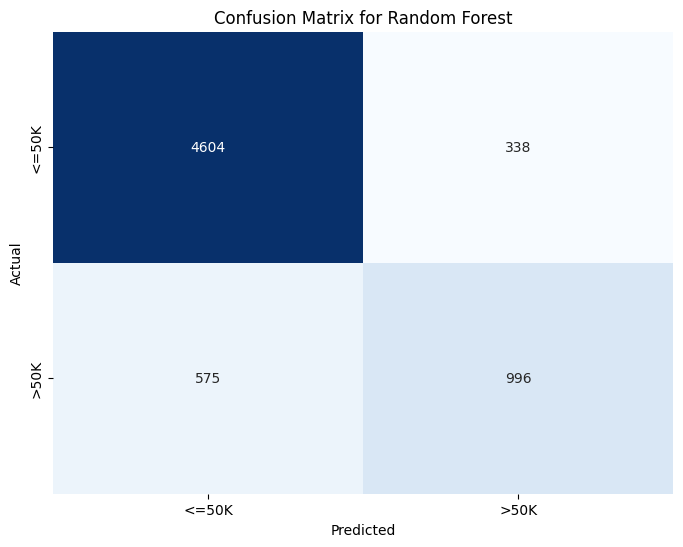

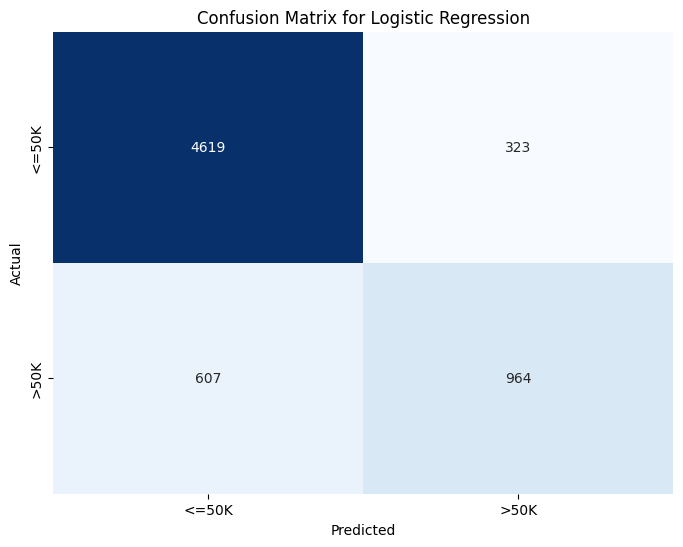

In [ ]:
import seaborn as sns

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

svm_cm = confusion_matrix(y_test, svm_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)

plot_confusion_matrix(svm_cm, 'SVM')
plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(lr_cm, 'Logistic Regression')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid,
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random_search.fit(X_train_scaled, y_train)

print("Best Parameters for Random Forest:", rf_random_search.best_params_)
print("Best Score for Random Forest:", rf_random_search.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
171 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
171 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Score for Random Forest: 0.8626383725339489


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_param_grid,
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

lr_random_search.fit(X_train_scaled, y_train)

print("Best Parameters for Logistic Regression:", lr_random_search.best_params_)
print("Best Score for Logistic Regression:", lr_random_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best Score for Logistic Regression: 0.8508139715319883


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature importance (Random Forest)
feature_importances = rf_model.feature_importances_
features = X_train_encoded.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features, color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

# Confusion matrix heatmap for best-performing model (Random Forest in this case)
from sklearn.metrics import confusion_matrix

best_predictions = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reshape data for 1D CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# CNN model
cnn_model = keras.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"1D CNN Test Accuracy: {cnn_accuracy:.4f}")


In [ ]:

# Pairplot to visualize relationships between features
import seaborn as sns

sns.pairplot(data, diag_kind='kde', hue=target_column)
plt.suptitle("Feature Pairwise Relationships", y=1.02)
plt.show()

# ROC and Precision-Recall Curves for Model Evaluation
from sklearn.metrics import roc_curve, auc, precision_recall_curve

models = {"SVM": svm_model, "Random Forest": rf_model, "Logistic Regression": lr_model}
plt.figure(figsize=(12, 6))

for name, model in models.items():
    y_probs = model.decision_function(X_test_scaled) if name == "SVM" else model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_probs = model.decision_function(X_test_scaled) if name == "SVM" else model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    plt.plot(recall, precision, label=f"{name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()


In [ ]:

# Training loss and accuracy plots for CNN
history = cnn_model.history.history

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss', color='blue')
plt.plot(history['val_loss'], label='Validation Loss', color='red', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN Training & Validation Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training & Validation Accuracy")
plt.legend()

plt.show()
